In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



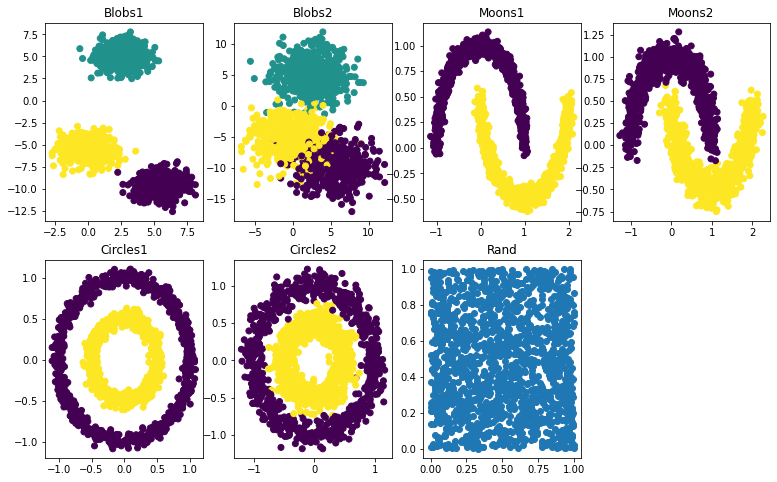

In [2]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons1')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons2')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles1')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles2')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

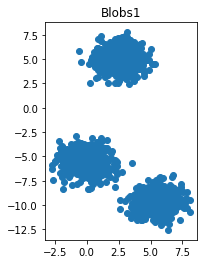

In [3]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1])
plt.title('Blobs1')
plt.show()

Code for RandIndex function

In [4]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [5]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [6]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

In [7]:
hopkins(Blobs1_X)

0.9404724305223088

In [8]:
hopkins(Blobs2_X)

0.8233742977110474

In [9]:
hopkins(Moons1_X)

0.9271506073445901

In [10]:
hopkins(Moons2_X)

0.8833528334405517

In [11]:
hopkins(Circles1_X)

0.8228701605340246

In [12]:
hopkins(Circles2_X)

0.7746958058823571

In [13]:
hopkins(Rand_X)

0.6256297692806273

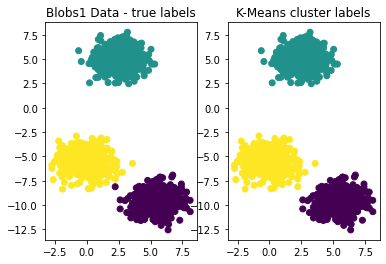

In [14]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_blob1 = kmeans.fit_predict(Blobs1_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_blob1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()


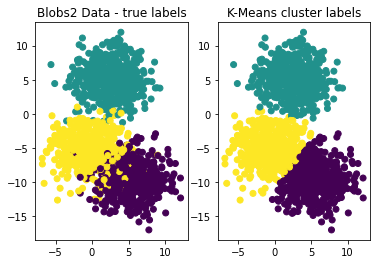

In [15]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_blob2 = kmeans.fit_predict(Blobs2_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y) # true clusters
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_blob2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

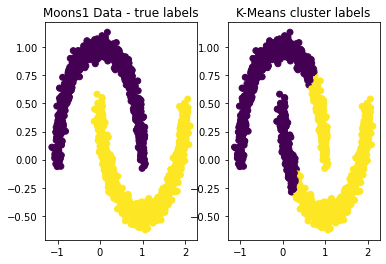

In [16]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_Moons1 = kmeans.fit_predict(Moons1_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y) # true clusters
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_Moons1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

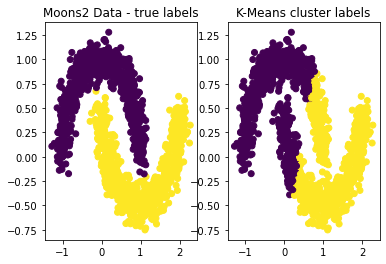

In [17]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_Moons2 = kmeans.fit_predict(Moons2_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_Moons2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

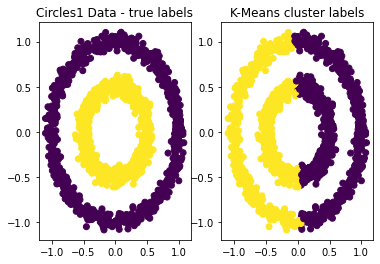

In [18]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_Circles1 = kmeans.fit_predict(Circles1_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y) # true clusters
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_Circles1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

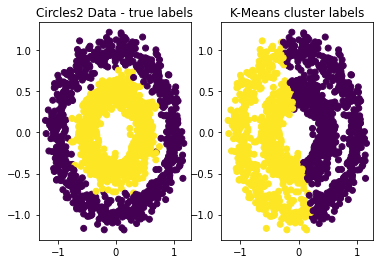

In [19]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_Circles2 = kmeans.fit_predict(Circles2_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y) # true clusters
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_Circles2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

In [20]:
print(rand_index(y_pred_blob1, Blobs1_y))

0.99911140760507


In [21]:
print(rand_index(y_pred_blob2, Blobs2_y))

0.9199715365799421


In [22]:
print(rand_index(y_pred_Moons1, Moons1_y))

0.6201236379808761


In [23]:
print(rand_index(y_pred_Moons2, Moons2_y))

0.6240836112964199


In [24]:
print(rand_index(y_pred_Circles1, Circles1_y))

0.4996744496330887


In [25]:
print(rand_index(y_pred_Circles2, Circles2_y))

0.4996744496330887


<span style="color:green">**Rand Index:** </span> Blobs1 > Blobs2 > Moons2 > Moons1 > Circles1=Circles2

